# **Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib.pyplot import figure

##**Data Preparation**

In [ ]:
df = pd.read_csv("/content/influenza_reportv6.csv")

In [ ]:
df.head()

,Country,Year,Week,Month,Weather,Tourist_Arrival,TotalPop_0_14,TotalPop_15_29,TotalPop_30_44,TotalPop_45_59,TotalPop_60Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,ALL_INF
0,Croatia,2000,1,1,1.37,31164.0,767.026,896.92,957.39,843.178,963.415,0.146,2131.647,2296.428,4428.075,12.0
1,Croatia,2000,2,1,1.37,31164.0,767.026,896.92,957.39,843.178,963.415,0.146,2131.647,2296.428,4428.075,12.0
2,Croatia,2000,3,1,1.37,31164.0,767.026,896.92,957.39,843.178,963.415,0.146,2131.647,2296.428,4428.075,18.0
3,Croatia,2000,4,1,1.37,31164.0,767.026,896.92,957.39,843.178,963.415,0.146,2131.647,2296.428,4428.075,21.0
4,Croatia,2000,5,2,2.99,37221.0,767.026,896.92,957.39,843.178,963.415,0.146,2131.647,2296.428,4428.075,14.0


In [ ]:
df.isnull().sum()

Country                0
Year                   0
Week                   0
Month                  0
Weather              517
Tourist_Arrival     1264
TotalPop_0_14          0
TotalPop_15_29         0
TotalPop_30_44         0
TotalPop_45_59         0
TotalPop_60Plus        0
PopTotal_100Plus      52
PopMale               52
PopFemale             52
PopTotal              52
ALL_INF             4085
dtype: int64

In [ ]:
name_countries = df['Country'].unique()

In [ ]:
df_final = pd.DataFrame()
name_countries = df['Country'].unique()

for name_country in name_countries :

  df_country = df[df['Country']==name_country]
  df_country  = df_country.interpolate(limit_direction="both")
  
  df_country['TimeStep'] = np.arange(len(df_country))
  df_country = df_country.drop(columns=['Year','Week','Month'])

  df_final = pd.concat([df_final,df_country], axis=0) 

In [ ]:
df_final.isnull().sum()

Country             0
Weather             0
Tourist_Arrival     0
TotalPop_0_14       0
TotalPop_15_29      0
TotalPop_30_44      0
TotalPop_45_59      0
TotalPop_60Plus     0
PopTotal_100Plus    0
PopMale             0
PopFemale           0
PopTotal            0
ALL_INF             0
TimeStep            0
dtype: int64

In [ ]:
df_final['CountryToCategorical'] = df_final['Country'].factorize()[0]
df_final = df_final.drop(columns=['Country'])

In [ ]:
print("########################################################################")
print("########################################################################")
# look at data
display(df_final.head())
print("########################################################################")
print("########################################################################")
# look a shape of data
display(df_final.shape)
print("########################################################################")
print("########################################################################")
# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df_final.iloc[:5,:5].dtypes)
print("########################################################################")
print("########################################################################")
# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df_final.iloc[:5,:5].isnull().any())
print("########################################################################")
print("########################################################################")
# display descriptive statistics
display(df_final.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

########################################################################
########################################################################


,Weather,Tourist_Arrival,TotalPop_0_14,TotalPop_15_29,TotalPop_30_44,TotalPop_45_59,TotalPop_60Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,ALL_INF,TimeStep,CountryToCategorical
0,1.37,31164.0,767.026,896.92,957.39,843.178,963.415,0.146,2131.647,2296.428,4428.075,12.0,0,0
1,1.37,31164.0,767.026,896.92,957.39,843.178,963.415,0.146,2131.647,2296.428,4428.075,12.0,1,0
2,1.37,31164.0,767.026,896.92,957.39,843.178,963.415,0.146,2131.647,2296.428,4428.075,18.0,2,0
3,1.37,31164.0,767.026,896.92,957.39,843.178,963.415,0.146,2131.647,2296.428,4428.075,21.0,3,0
4,2.99,37221.0,767.026,896.92,957.39,843.178,963.415,0.146,2131.647,2296.428,4428.075,14.0,4,0


########################################################################
########################################################################


(12573, 14)

########################################################################
########################################################################


Weather            float64
Tourist_Arrival    float64
TotalPop_0_14      float64
TotalPop_15_29     float64
TotalPop_30_44     float64
dtype: object

########################################################################
########################################################################


Weather            False
Tourist_Arrival    False
TotalPop_0_14      False
TotalPop_15_29     False
TotalPop_30_44     False
dtype: bool

########################################################################
########################################################################


,Weather,Tourist_Arrival,TotalPop_0_14,TotalPop_15_29,TotalPop_30_44,TotalPop_45_59,TotalPop_60Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,ALL_INF,TimeStep,CountryToCategorical
count,12573.000000,1.257300e+04,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000
mean,9.796766,3.602134e+07,5273.402182,5943.589914,7151.561098,6934.306034,8163.439502,5.849095,16376.032853,17096.273503,33472.306356,63.252883,571.000000,5.000000
std,7.332670,6.434622e+07,4421.929802,4888.043439,5898.220697,5874.996586,7106.628190,6.221614,13609.661711,14254.441561,27862.271518,272.695234,329.968675,3.162403
min,-9.220000,0.000000e+00,590.626000,659.938000,817.685000,841.569000,957.809000,0.146000,1969.142000,2112.515000,4081.657000,0.000000,0.000000,0.000000
25%,4.670000,6.294280e+05,1246.127000,1490.887000,1763.650000,1896.378000,1914.867000,0.684000,4150.103000,4229.812000,8379.915000,0.000000,285.000000,2.000000
50%,9.520000,2.537527e+06,2923.223000,3048.026000,3465.772000,3580.998000,3663.252000,2.196000,8284.404000,8398.523000,16682.927000,2.000000,571.000000,5.000000
75%,15.320000,3.760927e+07,10871.861000,11292.765000,12945.436000,12401.934000,14578.482000,10.620000,29437.725000,31089.057000,60550.092000,19.000000,857.000000,8.000000
85%,18.180000,7.520200e+07,11325.739000,12102.826000,13487.619000,13281.315000,16552.194000,14.082000,31465.650000,33196.604000,64667.590000,52.000000,971.000000,9.000000
95%,21.650000,1.975220e+08,11798.925000,13883.176000,16001.365000,18038.531000,20867.849000,17.981000,39828.458000,41637.481000,81453.894000,254.000000,1085.000000,10.000000
99%,24.150000,2.072740e+08,12419.139000,14165.989000,19901.128000,19520.153000,23656.829000,20.676000,41249.115000,42267.931000,83517.046000,1363.520000,1131.000000,10.000000


## Plot Time serie season

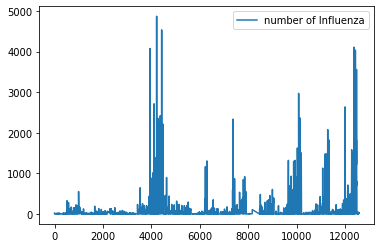

In [ ]:
influenza = df_selected['ALL_INF'].to_numpy()
x = range(len(influenza))

plt.plot(x,influenza,label='number of Influenza')
plt.legend()
plt.show()

## For each country 

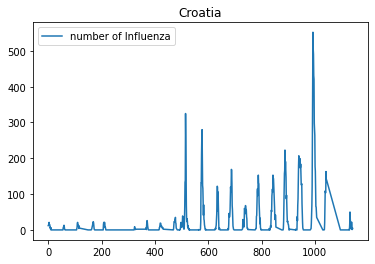

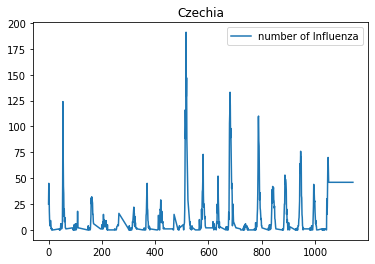

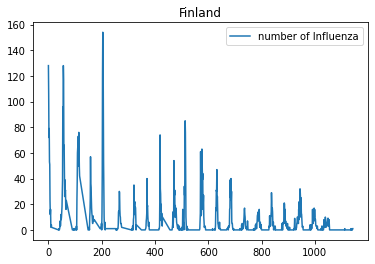

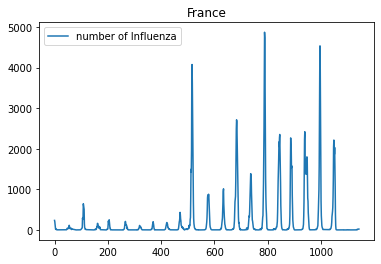

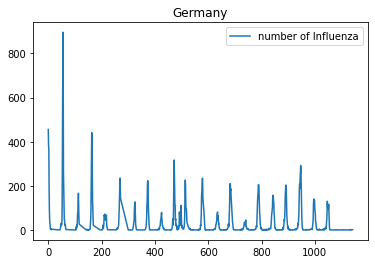

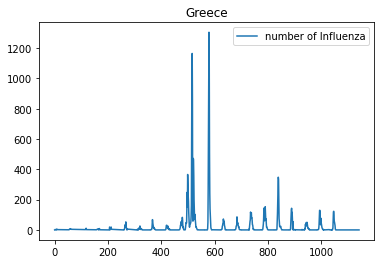

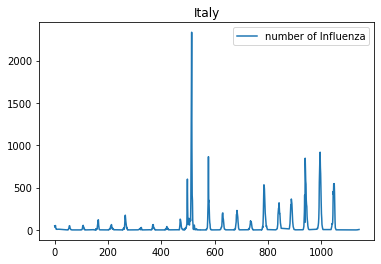

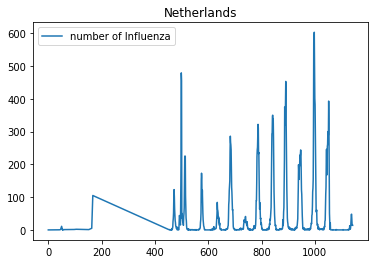

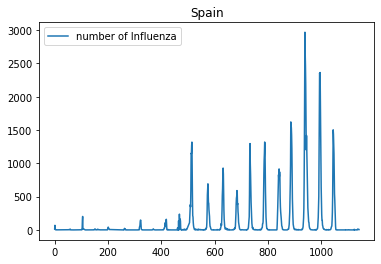

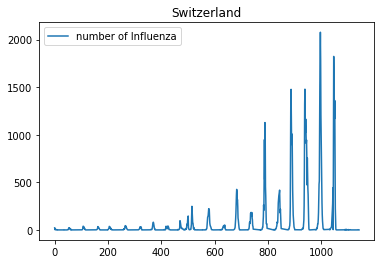

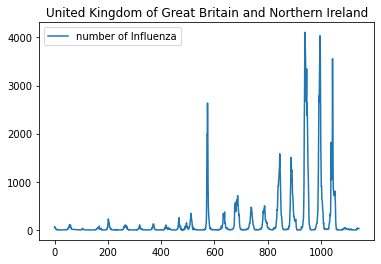

In [ ]:
number_countries = df_selected['CountryToCategorical'].unique()


for i in number_countries :

  country = df_selected.loc[df_selected['CountryToCategorical']==i]
  influenza = country['ALL_INF'].to_numpy()
  x = range(len(influenza))

  plt.plot(x,influenza,label='number of Influenza')
  plt.legend()
  plt.title(str(name_countries[i]))
  plt.show()

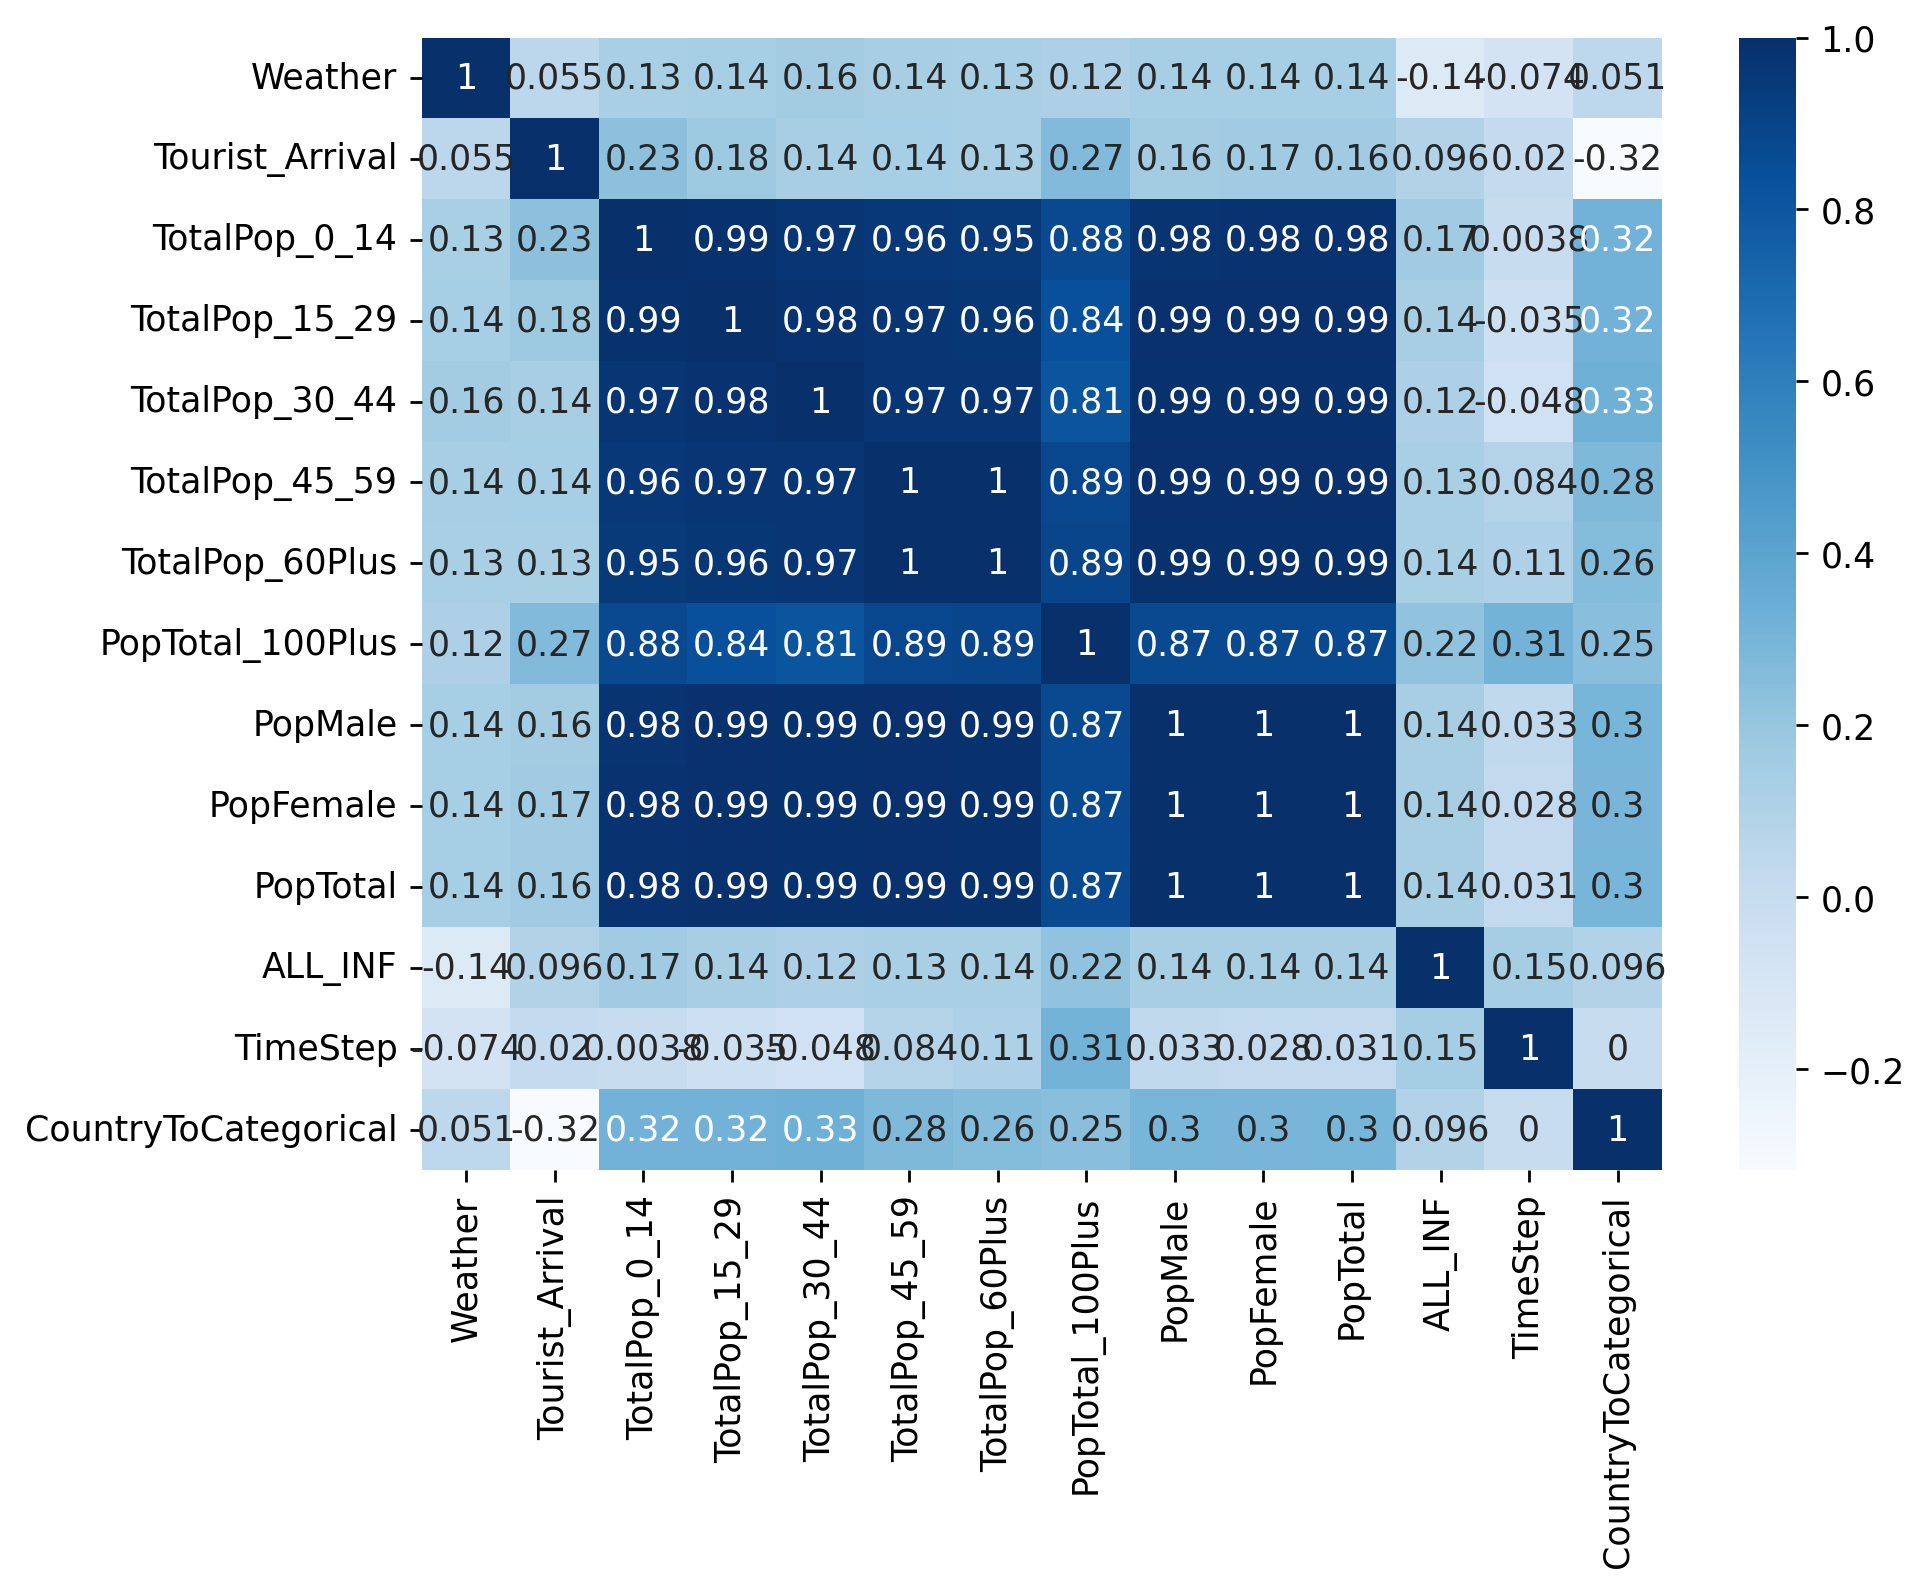

In [ ]:
figure(figsize=(8, 6), dpi=250)
corr = df_final.corr()

sb.heatmap(corr, cmap="Blues", annot=True)


1. There is a strong correlation between : TotalPop_0_14, Total_Pop_15_29, Total_Pop_30_44, Total_Pop_45_59, Total_Pop_60Plus, PopMale, PopFemale and PopTotal.
So we will only select for the further study "PopTotal".

2. TimeStep column : corresponds to a duration of 1 week.

3. CountryToCategorical column : corresponds to the transformation of the countries in "String" format to a numerical int format. (For example : Croatia is number 0). The order is the same in the variable "name_countries" above














In [ ]:
df_selected = df_final[['CountryToCategorical','TimeStep','PopTotal','PopTotal_100Plus','Weather','Tourist_Arrival','ALL_INF']]

In [ ]:
df_selected.head()

,CountryToCategorical,TimeStep,PopTotal,PopTotal_100Plus,Weather,Tourist_Arrival,ALL_INF
0,0,0,4428.075,0.146,1.37,31164.0,12.0
1,0,1,4428.075,0.146,1.37,31164.0,12.0
2,0,2,4428.075,0.146,1.37,31164.0,18.0
3,0,3,4428.075,0.146,1.37,31164.0,21.0
4,0,4,4428.075,0.146,2.99,37221.0,14.0


#**StandAlone Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## **Train Test Split**

In [ ]:
df_train , df_test = train_test_split(df_selected, test_size=0.2, random_state=42)

df_train_X = df_train.drop(columns=["ALL_INF"])
df_train_y = df_train["ALL_INF"]

df_test_X = df_test.drop(columns=["ALL_INF"])
df_test_y = df_test["ALL_INF"]

## **Neural Network LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

## Data

In [ ]:
X = df_selected[['CountryToCategorical','TimeStep','PopTotal','PopTotal_100Plus','Weather','Tourist_Arrival']].to_numpy()
y = df_selected[['ALL_INF']].to_numpy()

In [ ]:
number_countries = df_selected['CountryToCategorical'].unique()


data = np.empty([11, 1143,5])

for i in number_countries :

  country = df_selected.loc[df_selected['CountryToCategorical']==i]
  time = len(country)
  
  for j in range(time) :
    
    time_country = country.loc[country['TimeStep']==0]

    data[i,j,:] = time_country[['PopTotal','PopTotal_100Plus','Weather','Tourist_Arrival','ALL_INF']].to_numpy()

## Time Step

Based on weekly observations, we will predict number of influenza for the next week.

In [ ]:
TimeStep = 4

_,TimeSteps,_=data.shape

data_X = []
data_y = []


for t in range(TimeSteps-TimeStep-1) :
    data_X.append(data[:,t:t+TimeStep,:])
    data_y.append(data[:,t+TimeStep+1,4])


In [ ]:
data_X = np.asarray(data_X).reshape(-1,TimeStep,5)
data_y = np.asarray(data_y).reshape(-1,)

In [ ]:
data_X.shape,data_y.shape

((12518, 4, 5), (12518,))

In [ ]:
Train_X, Test_X, Train_y, Test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

## Hyperparameters

In [ ]:
num_hidden_units_1 = 64
num_hidden_units_2 = 32
num_percentage_dropout = 0.5

## Model

In [ ]:
def attention_temporal(input_data, sequence_length):
    """
    A temporal attention layer
    :param input_data: Network input
    :param sequence_length: Length of the input sequence
    :return: The output of attention layer
    """
    a = layers.Permute((2, 1))(input_data)
    a = layers.Dense(sequence_length, activation='sigmoid')(a)
    a_probs = layers.Permute((2, 1))(a)
    output_attention_mul = layers.Multiply()([input_data, a_probs])
    return output_attention_mul

def attention_element(input_data, input_dim):
    """
    A self-attention unit
    :param input_data: Network input
    :param input_dim: The feature dimension of the input
    :return: The output of the attention network
    """
    input_data_probs = layers.Dense(input_dim, activation='sigmoid')(input_data)  # sigmoid
    output_attention_mul = layers.Multiply()([input_data, input_data_probs])  # name='att_mul'
    return output_attention_mul

In [ ]:
_encoder_feature_size = 5
_observe_length = TimeStep
_predict_length = 1
_decoder_feature_size = 1
_prediction_size = 1
_embed_dropout = 0.5
_embed_size = 128
num_hidden_units_1 = 64
num_hidden_units_2 = 32

_encoder_input = tf.keras.Input(shape=(_observe_length,_encoder_feature_size),
                               name='encoder_input')
# Temporal attention module
_attention_net = attention_temporal(_encoder_input, _observe_length)

# Generate Encoder LSTM Unit

_encoder_outputs_states = layers.LSTM(num_hidden_units_1, return_sequences=True,return_state=True)(_attention_net)
_encoder_states = _encoder_outputs_states[1:]

# Generate Decoder LSTM unit
decoder_model = layers.LSTM(num_hidden_units_1,return_state=False)
_hidden_input = layers.RepeatVector(_predict_length)(_encoder_states[0])


# Embedding unit on the output of Encoder
_embedded_hidden_input = layers.Dense(_embed_size, activation='relu')(_hidden_input)
_decoder_input = layers.Dropout(_embed_dropout,
                                  name='dropout_dec_input')(_embedded_hidden_input)


# Self attention unit
att_input_dim = _decoder_feature_size
decoder_concat_inputs = attention_element(_decoder_input, att_input_dim)

# Initialize the decoder with encoder states
decoder_output = decoder_model(decoder_concat_inputs,
                                initial_state=_encoder_states)
decoder_output = layers.Dense(_prediction_size,
                        activation='relu',
                        name='decoder_dense')(decoder_output)

net_model = tf.keras.Model(inputs=[_encoder_input], outputs=decoder_output)
net_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 4, 5)]       0           []                               
                                                                                                  
 permute (Permute)              (None, 5, 4)         0           ['encoder_input[0][0]']          
                                                                                                  
 dense (Dense)                  (None, 5, 4)         20          ['permute[0][0]']                
                                                                                                  
 permute_1 (Permute)            (None, 4, 5)         0           ['dense[0][0]']                  
                                                                                              

In [ ]:
net_model.compile(loss='mse', optimizer='adam')

### Train the model

In [ ]:
batch_size = 32
epochs = 512

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = net_model.fit(Train_X, Train_y, epochs=epochs, batch_size=batch_size,validation_data=(Test_X, Test_y),callbacks=[callback])

Epoch 1/512
313/313 [==============================] - 8s 11ms/step - loss: 23294.6680 - val_loss: 21053.7070
Epoch 2/512
313/313 [==============================] - 2s 8ms/step - loss: 20867.8379 - val_loss: 19434.8887
Epoch 3/512
313/313 [==============================] - 2s 8ms/step - loss: 19494.8418 - val_loss: 18440.8477
Epoch 4/512
313/313 [==============================] - 2s 8ms/step - loss: 18658.1387 - val_loss: 17872.5176
Epoch 5/512
313/313 [==============================] - 2s 8ms/step - loss: 18184.4082 - val_loss: 17582.5918
Epoch 6/512
313/313 [==============================] - 2s 8ms/step - loss: 17835.6914 - val_loss: 17163.0312
Epoch 7/512
313/313 [==============================] - 3s 8ms/step - loss: 15304.7969 - val_loss: 12953.0146
Epoch 8/512
313/313 [==============================] - 3s 8ms/step - loss: 12540.8438 - val_loss: 11493.1416
Epoch 9/512
313/313 [==============================] - 3s 8ms/step - loss: 11244.8311 - val_loss: 10453.3906
Epoch 10/512
313/3

## History : Loss

In [ ]:
import matplotlib.pyplot as plt

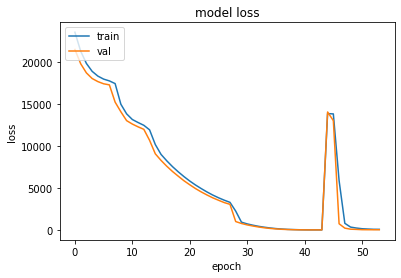

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#**Evaluation**

## **LSTM**

In [ ]:
predictions = net_model(Test_X)
rmse = np.sqrt(metrics.mean_squared_error(predictions,Test_y))
print(rmse)

0.07749604305946808
